In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import validation_curve
import joblib

# Especificação do caminho para o arquivo CSV contendo os dados
caminho_arquivo = r'C:\Users\rwx1294791\Downloads\AC2\AC2\spotify-2023.csv'

# Carregamento dos dados do arquivo CSV para um DataFrame chamado "dataset"
dataset = pd.read_csv(caminho_arquivo, encoding='latin1')

# Definição de uma função chamada "verificar_colunas(df)" que verifica o número de colunas no conjunto de dados e imprime as colunas se o número for igual ao esperado.
def verificar_colunas(df):
    numero_de_colunas_esperado = 24
    print("Colunas do conjunto de dados:")
    print(df.columns)
    if len(df.columns) == numero_de_colunas_esperado:
        print("O número de colunas está correto.")
    else:
        print("O número de colunas está incorreto. Verifique a estrutura do arquivo.")

# Definição de uma função chamada "verificar_valores_ausentes(df)" que verifica se existem valores ausentes no conjunto de dados e imprime uma mensagem apropriada.
def verificar_valores_ausentes(df):
    valores_ausentes = df.isnull().sum().sum()
    if valores_ausentes == 0:
        print("Não há valores ausentes nos dados.")
    else:
        print(f"Há {valores_ausentes} valores ausentes nos dados. Realize o tratamento apropriado.")

# Chamada da função "verificar_colunas(dataset)" para verificar as colunas no conjunto de dados.
verificar_colunas(dataset)

# Chamada da função "verificar_valores_ausentes(dataset)" para verificar a presença de valores ausentes no conjunto de dados.
verificar_valores_ausentes(dataset)


Colunas do conjunto de dados:
Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')
O número de colunas está correto.
Há 145 valores ausentes nos dados. Realize o tratamento apropriado.


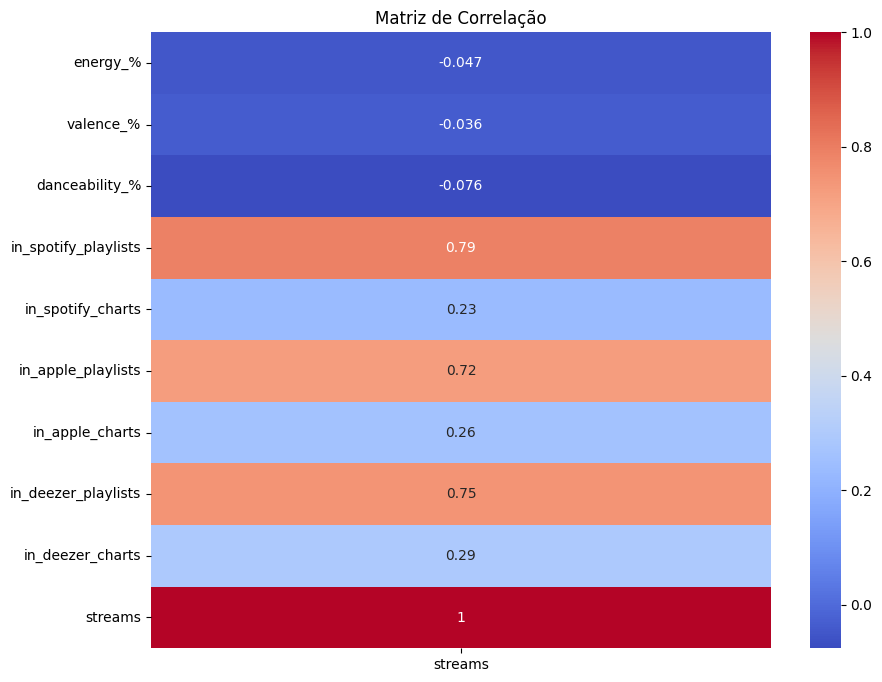

In [2]:
# Define as colunas numéricas relevantes para a análise
colunas_numericas_relevantes = ['energy_%', 'valence_%', 'danceability_%', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'streams']

# Selecione apenas as colunas numéricas relevantes do conjunto de dados
dataset_numeric = dataset[colunas_numericas_relevantes]

# Remova linhas com valores não numéricos (conversão de não numéricos para NaN)
dataset_numeric = dataset_numeric.apply(pd.to_numeric, errors='coerce')

# Descarte linhas com valores ausentes (NaN)
dataset_numeric = dataset_numeric.dropna()

# Calcule a matriz de correlação entre as colunas numéricas
correlation_matrix = dataset_numeric.corr()

# Visualize a matriz de correlação em um mapa de calor usando a biblioteca seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['streams']], annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()



In [3]:
def plotar_curva_aprendizado(modelo, X, y, scoring='neg_mean_squared_error', cv=5):
    # Calcule os tamanhos dos conjuntos de treinamento
    train_sizes, train_scores, test_scores = learning_curve(modelo, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    # Calcule as médias das pontuações
    train_scores_mean = -np.mean(train_scores, axis=1)  # Calcula a média das pontuações de treinamento
    test_scores_mean = -np.mean(test_scores, axis=1)    # Calcula a média das pontuações de teste
    
    # Crie o gráfico da curva de aprendizado
    plt.figure()
    plt.title("Curva de Aprendizado")
    plt.xlabel("Tamanho do Conjunto de Treinamento")
    plt.ylabel("Erro Quadrático Médio (MSE)")
    plt.grid()
    
    # Plote as curvas de aprendizado
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")  # Curva de aprendizado para o treinamento
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Teste")         # Curva de aprendizado para os dados de teste
    
    plt.legend(loc="best")  # Adiciona a legenda ao gráfico
    plt.show()  # Exibe o gráfico da curva de aprendizado


In [4]:
# Dados e divisão em treinamento/teste

# X representa as características (variáveis independentes) que serão usadas para prever y.
X = dataset_numeric[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']]

# y representa a variável alvo que desejamos prever com base nas características.
y = dataset_numeric['streams']

# Dividindo os dados em conjuntos de treinamento e teste para avaliar o desempenho do modelo.
# Aqui, definimos que 80% dos dados serão usados para treinamento e 20% para teste, e usamos random_state para garantir a reprodutibilidade dos resultados.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


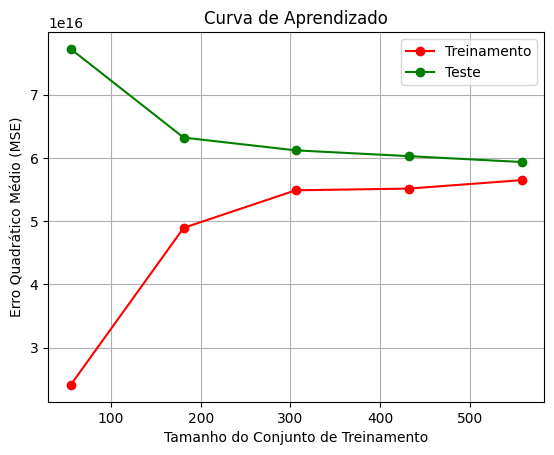

Regressão Linear:
Erro Quadrático Médio (MSE): 3.179646280751579e+16
Coeficiente de Determinação (R²): 0.7618752631698053


In [ ]:
# Treinamento da Regressão Linear

# Crie uma instância do modelo de regressão linear
modelo_linear = LinearRegression()

# Treine o modelo de regressão linear com os dados de treinamento
modelo_linear.fit(X_train, y_train)

# Avaliação do modelo

# Faça previsões com o modelo treinado nos dados de teste
y_pred = modelo_linear.predict(X_test)

# Calcule o Erro Quadrático Médio (MSE) para avaliar a precisão do modelo
mse_linear = mean_squared_error(y_test, y_pred)

# Calcule o Coeficiente de Determinação (R²) para avaliar o ajuste do modelo aos dados
r2_linear = r2_score(y_test, y_pred)

# Resultados

# Plote a curva de aprendizado do modelo de regressão linear
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Gráfico de Dispersão: Valores Reais vs. Previsões (Regressão Linear)")
plt.show()

# Exiba os resultados da regressão linear
print("Regressão Linear:")
print(f'Erro Quadrático Médio (MSE): {mse_linear}')
print(f'Coeficiente de Determinação (R²): {r2_linear}')


Resultados da busca encontrados e carregados.


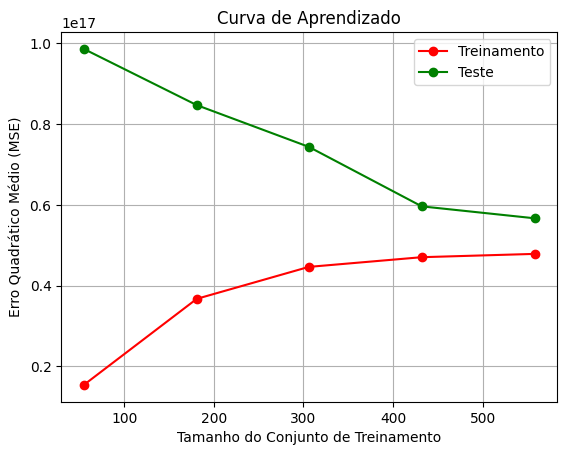

Melhores Hiperparâmetros: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 7}
Erro Quadrático Médio (MSE): 3.4902377419821292e+16
Coeficiente de Determinação (R²): 0.7386149683329379


In [6]:

# Função para realizar a busca pelos melhores hiperparâmetros e retornar os resultados
def buscar_ou_executar_busca(X_train, y_train):
    try:
        # Verifica se os resultados da busca já foram salvos
        melhores_hiperparâmetros = joblib.load("melhores_hiperparametros.pkl")
        print("Resultados da busca encontrados e carregados.")
    except FileNotFoundError:
        print("Realizando busca pelos melhores hiperparâmetros...")
        # Defina uma grade de hiperparâmetros para a busca
        param_grid = {
            'max_depth': [None] + list(range(1, 101)),
            'min_samples_split': list(range(2, 21)),  
            'min_samples_leaf': list(range(1, 21))  
        }
        # Crie um modelo DecisionTreeRegressor
        modelo = DecisionTreeRegressor()
        # Realize a busca em grade para encontrar os melhores hiperparâmetros
        busca_grid = GridSearchCV(modelo, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        busca_grid.fit(X_train, y_train)
        # Obtenha os melhores hiperparâmetros da busca em grade
        melhores_hiperparâmetros = busca_grid.best_params_
        # Salve os resultados da busca em um arquivo
        joblib.dump(melhores_hiperparâmetros, "melhores_hiperparametros.pkl")
        print("Resultados da busca salvos.")
    return melhores_hiperparâmetros

# Função para otimizar a árvore de decisão com os melhores hiperparâmetros
def otimizar_arvore_decisao(X_train, y_train, X_test, y_test, melhores_hiperparâmetros):
    # Crie um modelo DecisionTreeRegressor otimizado com os melhores hiperparâmetros
    modelo_otimizado = DecisionTreeRegressor(**melhores_hiperparâmetros)
    modelo_otimizado.fit(X_train, y_train)
    # Faça previsões nos dados de teste
    y_pred = modelo_otimizado.predict(X_test)
    # Calcule o Erro Quadrático Médio (MSE) e o coeficiente de determinação (R²)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Retorne métricas de avaliação
    return mse, r2, modelo_otimizado

# Supondo que você tenha carregado seus dados de treinamento e teste em X_train, y_train, X_test e y_test

# Execute a busca ou carregue os resultados da busca
melhores_hiperparametros = buscar_ou_executar_busca(X_train, y_train)

# Chame a função de otimização e armazene os resultados
mse, r2, modelo_otimizado = otimizar_arvore_decisao(X_train, y_train, X_test, y_test, melhores_hiperparametros)

# Plote a curva de aprendizado do modelo otimizado
plotar_curva_aprendizado(modelo_otimizado, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Imprima os melhores hiperparâmetros e métricas de avaliação
print("Melhores Hiperparâmetros:", melhores_hiperparametros)
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Coeficiente de Determinação (R²): {r2}')


Resultados da busca encontrados e carregados.


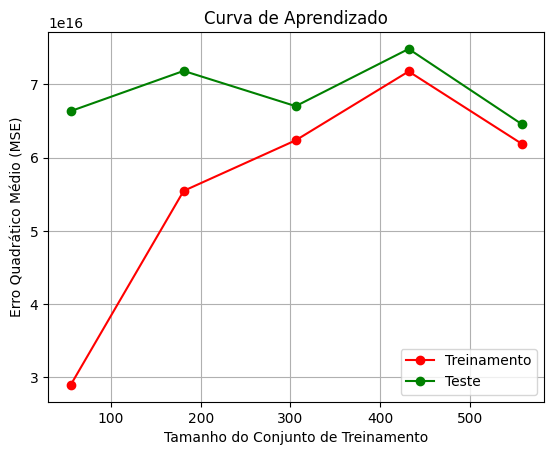

Erro Quadrático Médio (MSE): 3.8645640672615256e+16
Coeficiente de Determinação (R²): 0.7105815489443195


In [7]:
# Função para realizar a busca pelos melhores hiperparâmetros
def buscar_ou_executar_busca_rede_neural(X_train, y_train, random_state=58):
    try:
        # Verifica se os resultados da busca já foram salvos
        melhor_modelo = joblib.load("melhor_modelo_rede_neural.pkl")
        print("Resultados da busca encontrados e carregados.")
    except FileNotFoundError:
        print("Realizando busca pelos melhores hiperparâmetros...")
        # Definir os hiperparâmetros a serem ajustados
        param_grid = {
            'hidden_layer_sizes': [(100, 50)],
            'alpha': [0.0001, 0.001],
            'learning_rate_init': [0.001, 0.01],
            'max_iter': [1000, 2000],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'lbfgs']
        }

        # Instanciar o modelo MLPRegressor com o random_state definido
        modelo_rede_neural = MLPRegressor(random_state=random_state)

        # Configurar a pesquisa em grade
        grid_search = GridSearchCV(modelo_rede_neural, param_grid, cv=5, scoring='r2', n_jobs=-1)

        # Realizar a pesquisa em grade com os dados de treinamento
        grid_search.fit(X_train, y_train)

        # Recuperar o melhor modelo encontrado pela pesquisa em grade
        melhor_modelo = grid_search.best_estimator_

        # Salvar o melhor modelo em um arquivo
        joblib.dump(melhor_modelo, "melhor_modelo_rede_neural.pkl")
        print("Resultados da busca salvos.")

    return melhor_modelo

# Supondo que você tenha carregado seus dados de treinamento em X_train e y_train

# Execute a busca ou carregue os resultados da busca
melhor_modelo_rede_neural = buscar_ou_executar_busca_rede_neural(X_train, y_train)

# Chame a função para plotar a curva de aprendizado
plotar_curva_aprendizado(melhor_modelo_rede_neural, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Supondo que você tenha carregado seus dados de teste em X_test e y_test

# Fazer previsões com o melhor modelo
y_pred = melhor_modelo_rede_neural.predict(X_test)

# Avaliar o desempenho do melhor modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir métricas de avaliação do melhor modelo
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Coeficiente de Determinação (R²): {r2}')
